In [24]:
# import numpy as np
import matplotlib as mpl
# from matplotlib.colors import BoundaryNorm
import matplotlib.pyplot as plt
import xarray as xr
# import pandas as pd
import cartopy.crs as ccrs
import datetime
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "jshtml" #for jupyterlab display

## Explore MiCASA outputs

In [2]:
filepath = 'micasa-data/daily-0.1deg-final/holding/3hrly/2015/01/MiCASA_v1_flux_x3600_y1800_3hrly_20150101.nc4'
ds = xr.open_dataset(filepath)
# ds
ds['NEE']

<xarray.DataArray 'NEE' (time: 8, lat: 1800, lon: 3600)> Size: 207MB
[51840000 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 14kB -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
  * lon      (lon) float64 29kB -179.9 -179.8 -179.8 ... 179.8 179.8 179.9
  * time     (time) datetime64[ns] 64B 2015-01-01 ... 2015-01-01T21:00:00
Attributes:
    units:         kg m-2 s-1
    expressed_as:  carbon
    long_name:     Net ecosystem exchange

In [29]:
# ds['NEE'].mean(dim='time').plot()
# ds['NEE'].isel(time=0).plot()

Text(0.5, 1.0, 'Jan 01 2015')

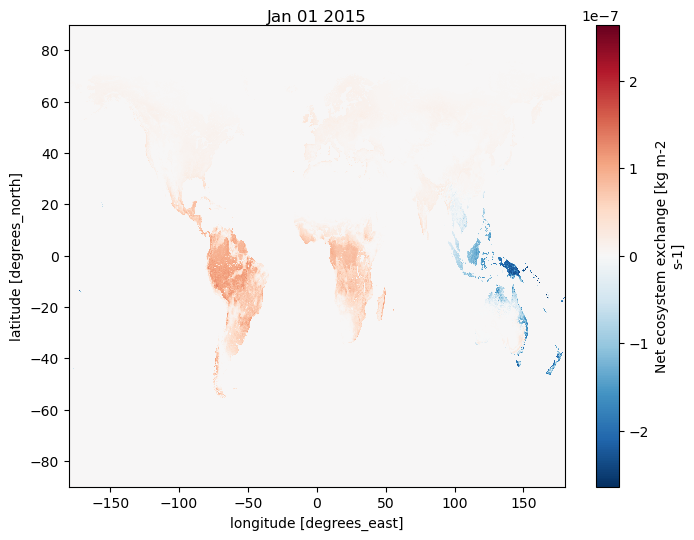

In [30]:
# Create initial plot
fig, ax = plt.subplots(figsize=(8,6))
initial_plot = ds['NEE'].isel(time=0).plot.pcolormesh(ax=ax)
title = str(ds['NEE'].isel(time=0)['time'].dt.strftime('%b %d %Y').values)
ax.set_title(title,pad=-0.1)

In [34]:
# Animate over time
def animate(frame):
    ax.clear()
    # ax.axis('off')
    plot = ds['NEE'].isel(time=frame).plot.pcolormesh(
        ax=ax,
        add_colorbar=False,
        )
    title = str(ds['NEE'].isel(time=frame)['time'].dt.strftime('%b %d %Y %H:%M').values)
    ax.set_title(title,pad=0)
    return plot

In [35]:
anim = FuncAnimation(fig=fig, func=animate, frames=len(ds.time))
anim

## Import Ameriflux data